In [1]:
import numpy as np
import pandas as pd

In [2]:
#Handling Numeric Columns


featureArray = np.array([[5000,19],[10000,25],[9800,30]])
featureArray

array([[ 5000,    19],
       [10000,    25],
       [ 9800,    30]])

In [3]:
# 1. Rescaling data based on 0,1 scale
# Data remains the same. Only the scale of the data is modified
# MinMaxPolarization
from sklearn.preprocessing import MinMaxScaler
scaleData = MinMaxScaler(feature_range=(0,1))
scaledFeatures = scaleData.fit_transform(featureArray)
scaledFeatures

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.        ],
       [1.        , 0.54545455],
       [0.96      , 1.        ]])

In [4]:
#2. Standardization ----> mean = 0 , stddev = 1
from sklearn.preprocessing import StandardScaler
standardFeatures = StandardScaler()
scaledFeatures = standardFeatures.fit_transform(featureArray)
scaledFeatures

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.41333087, -1.26012384],
       [ 0.74993067,  0.07412493],
       [ 0.66340021,  1.18599891]])

In [5]:
#3. Normalization - adjusting values measured on 
# a. Averaging Scale --- Medical use-cases
# b. RangeBound Scale ---- MinMax with a difference of only int values (Image Processing)
# c. L1 Normalization
# d. L2 Normalization
# more than 20 definitions on Normalization (confusing). Change defn based on use-case (Experience !!!)

# L1 Normalization (Least Absolute Deviations) (Least Absolute Errors)
# Manhattan Distance
from sklearn.preprocessing import Normalizer
norm1 = Normalizer(norm="l1")
scaledFeatures = norm1.fit_transform(featureArray)
print(scaledFeatures)
# L2 Normalization
# Euclidean Distance
from sklearn.preprocessing import Normalizer
norm1 = Normalizer(norm="l2")
scaledFeatures = norm1.fit_transform(featureArray)
print(scaledFeatures)

[[0.99621439 0.00378561]
 [0.99750623 0.00249377]
 [0.99694812 0.00305188]]
[[0.99999278 0.00379997]
 [0.99999688 0.00249999]
 [0.99999531 0.00306121]]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

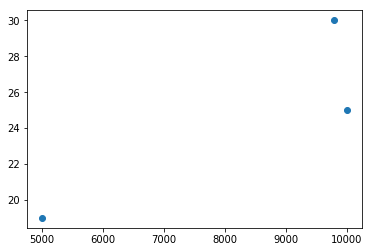

In [8]:
plt.scatter(featureArray[:,0],featureArray[:,1])

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([5.000000e+03, 1.000045e+08, 2.000040e+08, 3.000035e+08,
        4.000030e+08, 5.000025e+08, 6.000020e+08, 7.000015e+08,
        8.000010e+08, 9.000005e+08, 1.000000e+09]),
 <a list of 10 Patch objects>)

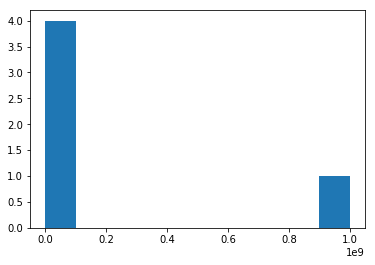

In [13]:
# Yearly salary of the typical indian people (sample)
featureArray2 = np.array([[5000,19],[10000,25],[9800,30],[1000000000,50],[6000,19]])
featureArray2
#Average earning of an Indian citizen based on the above dataset
#problem with the data is in my data I have extreme value that is affecting the motto of the use-case
#Whatever is that extreme data ----> Outliers
#Outliers are those extreme values that affects the generalized view of the dataset
#last record is the outlier
# How to identify the outlier (Exploratory data analysis using Statistics)
#                             (Visual EDA using Graphs)
# Simplest approach is ask your DATA SCIENTISTS !!!
# Better approach is to go for Visual EDA
# Create histogram for each columns
# Histogram (Frequency of the unique elements)
# Input is only one column
plt.hist(featureArray2[:,0])

(array([2., 1., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([19. , 22.1, 25.2, 28.3, 31.4, 34.5, 37.6, 40.7, 43.8, 46.9, 50. ]),
 <a list of 10 Patch objects>)

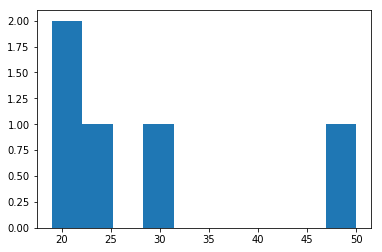

In [14]:
plt.hist(featureArray2[:,1])

In [15]:
#If your data scientist says, the given data has outliers,
# You need to scale your feature using RobustScaler.
# RobustScaler - StandardScaler with an extra feature to handle outlier
# Is it an effective? ----> Its effective upto 75- 85 %
from sklearn.preprocessing import RobustScaler
robustS = RobustScaler()
scaledFeatures = robustS.fit_transform(featureArray2)
scaledFeatures

array([[-1.20000000e+00, -5.45454545e-01],
       [ 5.00000000e-02,  0.00000000e+00],
       [ 0.00000000e+00,  4.54545455e-01],
       [ 2.49997550e+05,  2.27272727e+00],
       [-9.50000000e-01, -5.45454545e-01]])

(array([2., 1., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([-0.54545455, -0.26363636,  0.01818182,  0.3       ,  0.58181818,
         0.86363636,  1.14545455,  1.42727273,  1.70909091,  1.99090909,
         2.27272727]),
 <a list of 10 Patch objects>)

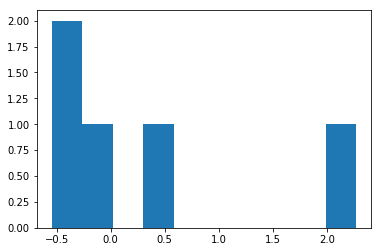

In [17]:
plt.hist(scaledFeatures[:,1])